In [29]:
from lifelines import KaplanMeierFitter, CoxPHFitter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
genomic_file = "../MSK_Genomic_Data.csv"

gene_features = pd.read_csv(genomic_file)
#Patient IDs have a space at the end of the name
gene_features['ID'] = gene_features['ID'].str.strip()

In [33]:
labels_file = "../RFS_Scout.xlsx"

rfs_labels = pd.read_excel(labels_file)

In [34]:
rfs_labels.head

<bound method NDFrame.head of                      ID  RFS_Code        RFS
0       Erasmus_ICC-003         0  46.457124
1       Erasmus_ICC-005         1   7.425255
2       Erasmus_ICC-006         1  31.278064
3       Erasmus_ICC-011         1  22.735735
4       Erasmus_ICC-015         1  21.355821
..                  ...       ...        ...
180  ICC_Radiogen_Add59         1   8.000000
181  ICC_Radiogen_Add60         0   5.000000
182  ICC_Radiogen_Add61         0   4.000000
183  ICC_Radiogen_Add62         0   3.000000
184  ICC_Radiogen_Add63         1  14.000000

[185 rows x 3 columns]>

In [35]:
# Getting intersection of patients with gene features and RFS labels all in one dataframe
genes_and_labels = pd.merge(gene_features, rfs_labels, how='inner', on=['ID', 'ID'])

In [36]:
genes_and_labels.RFS_Code

0      0
1      1
2      1
3      1
4      0
      ..
106    0
107    1
108    0
109    0
110    0
Name: RFS_Code, Length: 111, dtype: int64

In [ ]:
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

rossi = load_rossi()
cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest')

cph.print_summary()

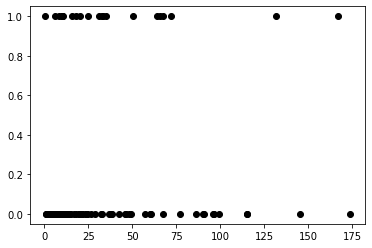

In [49]:
# x-axis is RFS
# y-axis is epigenetic_pathway binary indicator

plt.plot(genes_and_labels.RFS, genes_and_labels.ARID1A, 'o', color='black')

Text(0.5, 1.0, 'Recurrence Free Survival for Mutations')

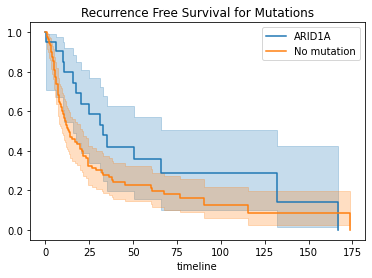

In [50]:
gene = 'ARID1A'

epi_path = genes_and_labels.loc[genes_and_labels[gene] == 1]
non_epi = genes_and_labels.loc[genes_and_labels[gene] == 0]

kmf = KaplanMeierFitter()
ax = plt.subplot(111)

kmf.fit(epi_path.RFS, epi_path.RFS_Code, label=gene)
kmf.plot_survival_function(ax=ax)

kmf.fit(non_epi.RFS, non_epi.RFS_Code, label="No mutation")
kmf.plot_survival_function(ax=ax)

plt.title("Recurrence Free Survival for Mutations")
